<a href="https://colab.research.google.com/github/divsal009/div/blob/master/Optimization_firefly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions

%matplotlib inline

In [ ]:
import random
import math
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn import svm
import numpy as np
from sklearn.ensemble import RandomForestClassifier

class FireflyAlgorithm():

    def __init__(self, function):
        self.D = X.shape[1]  # dimension of the problem (Gene number)
        self.NP = 100  # population size (Firefly number)
        self.nFES = 1  # number of function evaluations (repeate number)
        self.alpha = 1  # alpha parameter,(randomization parameter)
        self.betamin = 0.5  # beta parameter
        self.gamma = 1  # gamma parameter (light intensity coefficency)
        # sort of fireflies according to fitness value
        self.Index = [0] * self.NP
        self.Fireflies = [[np.random.rand() for i in range(self.D)] for j in range(self.NP)]  # firefly agents,
        self.Fireflies_tmp = [[np.random.rand() for i in range(self.D)] for j in range(
            self.NP)]  # intermediate pop
        self.Fitness = [0.0] * self.NP  # fitness values (Accuracy)
        self.I = [0.0] * self.NP  # light intensity
        self.nbest = [0.0] * self.NP  # the best solution found so far
        self.LB = 0  # lower bound
        self.UB = 1  # upper bound
        self.fbest = None  # the best
        self.evaluations = 0
        self.Fun = function

    def alpha_new(self, a):
        delta = 1.0 - math.pow((math.pow(10.0, -4.0) / 0.9), 1.0 / float(a))
        return (1 - delta) * self.alpha

    def sort_ffa(self):  # implementation of bubble sort

        for i in range(self.NP):
            self.Index[i] = i

        for i in range(0, (self.NP - 1)):
            j = i + 1
            for j in range(j, self.NP):
                if (self.I[i] > self.I[j]):
                    z = self.I[i]  # exchange attractiveness
                    self.I[i] = self.I[j]
                    self.I[j] = z
                    z = self.Fitness[i]  # exchange fitness
                    self.Fitness[i] = self.Fitness[j]
                    self.Fitness[j] = z
                    z = self.Index[i]  # exchange indexes
                    self.Index[i] = self.Index[j]
                    self.Index[j] = z


    def replace_ffa(self):  # replace the old population according to the new Index values
        # copy original population to a temporary area
        for i in range(self.NP):
            for j in range(self.D):
                self.Fireflies_tmp[i][j] = self.Fireflies[i][j]

        # generational selection in the sense of an EA
        for i in range(self.NP):
            for j in range(self.D):
                self.Fireflies[i][j] = self.Fireflies_tmp[self.Index[i]][j]

    def FindLimits(self, k):
        for i in range(self.D):
            if self.Fireflies[k][i] < self.LB:
                self.Fireflies[k][i] = self.LB
            if self.Fireflies[k][i] > self.UB:
                self.Fireflies[k][i] = self.UB

    def move_ffa(self):
        for i in range(self.NP):
            scale = abs(self.UB - self.LB)
            for j in range(self.NP):
                r = 0.0
                for k in range(self.D):
                    r += (self.Fireflies[i][k] - self.Fireflies[j][k]) * \
                        (self.Fireflies[i][k] - self.Fireflies[j][k])
                r = math.sqrt(r)
                if self.I[i] > self.I[j]:  # brighter and more attractive
                    beta0 = 1.0
                    beta = (beta0 - self.betamin) * math.exp(-self.gamma * math.pow(r, 2.0)) + self.betamin
                    for k in range(self.D):
                        r = random.uniform(0, 1)
                        tmpf = self.alpha * (r - 0.5) * scale
                        self.Fireflies[i][k] = self.Fireflies[i][
                            k] * (1.0 - beta) + self.Fireflies_tmp[j][k] * beta + tmpf
            self.FindLimits(i)

    def Run(self):
        print("Strated : ")
        while self.evaluations < self.nFES:
            print("in loop : ")
            # optional reducing of alpha
            #self.alpha = self.alpha_new(self.nFES/self.NP)
            self.evaluations = self.evaluations + 1
            # evaluate new solutions
            for i in range(self.NP):
                print("calculating fitness "+str(i))
#                 print(self.Fireflies[i])
                self.Fitness[i] = self.Fun(self.Fireflies[i])
                self.I[i] = self.Fitness[i]
            # ranking fireflies by their light intensit
            self.sort_ffa()
            # replace old population
            self.replace_ffa()
            # move all fireflies to the better locations
            self.move_ffa()
            #print(self.Fireflies[self.NP - 1])
        bestFirefly = self.Fireflies[self.NP - 1]
        return bestFirefly


def evaluation(feature_possibilities):
        feature_possibilities = np.round(feature_possibilities)

        feature_possibilities = feature_possibilities > np.float32(0.9)
        if sum(feature_possibilities)>2:

            selectedX = X[:, feature_possibilities]

            s = RandomForestClassifier(max_depth=2, random_state=0)

            loocv = LeaveOneOut()
            evaluation = cross_val_score(s, selectedX, y,  cv=loocv)

            return evaluation.mean()
        else:
            return 0


In [ ]:
import os
from PIL import Image
import numpy as np
# import keras
from tensorflow import keras 
import os
import cv2
from matplotlib import pyplot as plt
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg16 import decode_predictions
%pylab inline
import matplotlib.pyplot as plt

vggModel = VGG16(weights='imagenet', include_top=False)
resModel = ResNet50(weights='imagenet',include_top=False)
densModel = DenseNet121(weights='imagenet', include_top=False)

model = resModel

X = []
Y = []
classCount = 0

base_path='./dataset_new'
a=0
source_path=base_path
for child in os.listdir(source_path):
    classCount +=1
    print(child)
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            Qry = Image.open(os.path.join(sub_path, data_file))
            Qry = Qry.convert("RGB")
            Qry_ = np.array(Qry.resize((100,100)))
            Qry = Qry_.reshape([-1,100,100,3])
            feature_2=(resModel.predict([Qry])).flatten()
            X.append(feature_2)
            Y.append(child)
            Qry = Qry_.reshape([-1,100,100,3])
            feature_2=(resModel.predict([Qry])).flatten()
            X.append(feature_2)
            Y.append(child)

print('No of classes : ',classCount)


Populating the interactive namespace from numpy and matplotlib


C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


class_1
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 39ms/step
class_2
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 60ms/step
class_3
1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 63ms/step
No of classes :  3


In [ ]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
labelBinarizer = LabelEncoder()
y = labelBinarizer.fit_transform(Y)
print(y)

[0 0 0 ... 2 2 2]


In [ ]:
X = np.array(X)
print(X.shape)

(4258, 32768)


In [ ]:
# y = np.array(Y)
# print(y.shape)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=10)
clf = clf.fit(X, Y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               


(4258, 3592)

In [ ]:
X=X_new

In [ ]:
Algorithm = FireflyAlgorithm(evaluation)
Best = Algorithm.Run()


a = np.round(Best)

feature_take_or_not = a > np.float32(0.7)

# print(feature_take_or_not)

# print(Best)

true_number = np.array(np.unique(feature_take_or_not, return_counts=True)).T



# print(true_number)

# s = svm.SVC(kernel="linear")
# loocv = LeaveOneOut()
# evaluation = cross_val_score(s, bestX, y,  cv=loocv)
# print("Final Accuracy: %.6f%% (%.6f%%)" % (evaluation.mean(), evaluation.std() ))


Strated : 
in loop : 
calculating fitness 0
calculating fitness 1
calculating fitness 2
calculating fitness 3
calculating fitness 4
calculating fitness 5
calculating fitness 6
calculating fitness 7
calculating fitness 8
calculating fitness 9
calculating fitness 10
calculating fitness 11
calculating fitness 12
calculating fitness 13
calculating fitness 14
calculating fitness 15
calculating fitness 16
calculating fitness 17
calculating fitness 18
calculating fitness 19
calculating fitness 20
calculating fitness 21
calculating fitness 22
calculating fitness 23
calculating fitness 24
calculating fitness 25
calculating fitness 26
calculating fitness 27
calculating fitness 28
calculating fitness 29
calculating fitness 30
calculating fitness 31
calculating fitness 32
calculating fitness 33
calculating fitness 34
calculating fitness 35
calculating fitness 36
calculating fitness 37
calculating fitness 38
calculating fitness 39
calculating fitness 40
calculating fitness 41
calculating fitness 42

In [ ]:
bestX = X[:, feature_take_or_not]

In [ ]:
X=bestX

In [ ]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
labelBinarizer = LabelEncoder()
y = labelBinarizer.fit_transform(Y)
        
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(bestX), np.array(y), 
                                                    test_size=0.2, random_state=52)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle


clf1 =RandomForestClassifier(max_depth=25, random_state=0)

clf2 = GaussianNB()
clf3 = SVC(C=0.8, probability=True)
eclf = VotingClassifier(estimators=[('knn', clf1),('gnb',clf2),('svc',clf3)], voting='hard')
eclf.fit(bestX,y)

filename = 'finalized_model.sav'
pickle.dump(eclf, open(filename, 'wb'))

pickle.dump(labelBinarizer, open("labels.sav", 'wb'))
acc = eclf.score(X_test,y_test)
print(acc)

0.9859154929577465


In [ ]:
from sklearn.metrics import classification_report
ypred=eclf.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       288
         1.0       0.99      0.97      0.98       275
         2.0       1.00      0.99      0.99       289

    accuracy                           0.99       852
   macro avg       0.99      0.99      0.99       852
weighted avg       0.99      0.99      0.99       852



In [ ]:
import json
data={"X":bestX.tolist(),"Y":Y}
with open('data_new.json', 'w') as f:
    json.dump(data, f)

In [ ]:
obj_text = codecs.open(file_path, 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
a_new = np.array(b_new)

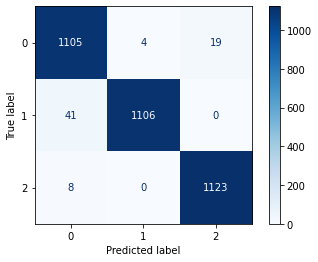

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred=eclf.predict(X_train)

cm = metrics.confusion_matrix(y_true=y_train, y_pred=y_pred)  # shape=(12, 12)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()


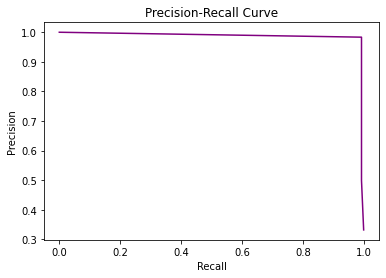

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_train, y_pred,pos_label=[2])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
roc_auc_score = cross_val_score(eclf,X_train,y_train, cv=3, scoring='roc_auc')
print('roc_auc_score ', np.mean(roc_auc_score ),roc_auc_score )

C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
Va

roc_auc_score  nan [nan nan nan]


C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\metrics\_scorer.py", line 88, in __call__
    *args, **kwargs)
  File "C:\Users\acer\Anaconda3\envs\py3.7\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  UserWarning,
